In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [2]:
train,test=fashion_mnist.load_data()

In [3]:
X_train,Y_train=train #Splitting data into images amd labels

In [4]:
X_test,Y_test=test

In [5]:
X_test.shape

(10000, 28, 28)

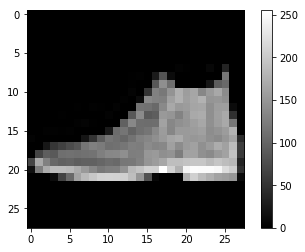

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_test[0],cmap='gray')#color map
plt.colorbar()
plt.show()

In [7]:
X_train=X_train.reshape(-1,X_train.shape[1]*X_train.shape[2])

In [8]:
X_test=X_test.reshape(-1,X_test.shape[1]*X_test.shape[2])

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)


C:\Users\KIIT\Miniconda3\envs\py35\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\KIIT\Miniconda3\envs\py35\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
X_test=sc.transform(X_test)

C:\Users\KIIT\Miniconda3\envs\py35\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
X_train

array([[-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       ...,
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729]])

In [12]:
from sklearn.decomposition import PCA
pca=PCA()
X_train=pca.fit_transform(X_train)

In [13]:
X_test=pca.transform(X_test)

In [14]:
explained_variance=pca.explained_variance_ratio_

In [16]:
count=0
sum1=0
for i in range(784):
    if sum1<0.92:
        sum1=sum1+explained_variance[i]
        count+=1

In [17]:
X_train

array([[-8.01174771e-01,  2.08667487e+01, -1.29451358e+01, ...,
        -1.10270152e-01, -1.40782640e-02,  5.94582173e-02],
       [ 1.70742060e+01, -4.96851249e+00, -2.07781957e+00, ...,
         1.43979158e-02, -8.79639960e-03, -6.54577116e-03],
       [-9.60164085e+00, -1.22961007e+01,  1.08228415e+00, ...,
         3.17106651e-03,  7.92388464e-03,  1.49373374e-02],
       ...,
       [ 9.37766441e+00, -1.31058579e+01, -8.83829805e+00, ...,
         2.72782448e-02, -4.49627587e-04,  5.02273514e-04],
       [-9.64563637e+00, -7.09528763e+00,  6.94533514e+00, ...,
         4.72269934e-03,  7.98533308e-03, -1.81433145e-03],
       [-2.13170793e+01, -1.74136729e+00,  5.47629241e+00, ...,
        -1.03787437e-01, -1.73135384e-02, -1.01755812e-02]])

In [18]:
X_train1=X_train[:,0:count]

In [19]:
X_test=X_test[:,0:count]

In [20]:
Y_train=Y_train.reshape(-1,1)

In [21]:
Y_train.shape

(60000, 1)

In [22]:
Y_test=Y_test.reshape(-1,1)

In [23]:
Y_train

array([[9],
       [0],
       [0],
       ...,
       [3],
       [0],
       [5]], dtype=uint8)

In [24]:
X_train1=np.append(X_train1,Y_train,axis=1)

In [25]:
X_test1=np.append(X_test,Y_test,axis=1)

In [26]:
X_train1=list(X_train1)

In [27]:
X_test1=list(X_test1)

In [29]:
for i in range(60000):
    X_train1[i]=list(X_train1[i])

In [30]:
for i in range(10000):
    X_test1[i]=list(X_test1[i])

In [31]:
train_set = {0:[] ,1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}

In [32]:
test_set = {0:[] ,1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}

In [33]:
for i in X_train1:
    train_set[i[-1]].append(i[:-1])


In [4]:
#Without built in logic
distances=[]
def KNN(data,new_features,k=5):
    for group in data:
        for features in data[group]:
            distance = np.linalg.norm(np.array(new_features) - np.array(features))
            distances.append([distance,group])
    votes = [i[1] for i in sorted(distances)[:k]]
    print (votes)

    vote_result = Counter(votes).most_common(1)[0][0]

    return vote_result



In [42]:
from collections import Counter
result=KNN(train_set,X_test1[0][0:-1])
print (result)

In [34]:
#With built in logic
from sklearn.neighbors import KNeighborsClassifier

In [35]:
Y_train

array([[9],
       [0],
       [0],
       ...,
       [3],
       [0],
       [5]], dtype=uint8)

In [36]:
model = KNeighborsClassifier()
model.fit(X_train1,Y_train[:,0])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [37]:
y_pred = model.predict(X_test1)

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [39]:
print(confusion_matrix(Y_test,y_pred))

[[933   1  19  19   7   0  16   0   5   0]
 [  9 969   4  11   5   0   2   0   0   0]
 [ 23   0 838  13  95   0  29   0   2   0]
 [ 21   6  13 895  41   0  23   0   1   0]
 [  1   1  86  27 829   0  54   0   2   0]
 [  0   0   0   1   0 908   2  53   3  33]
 [ 55   1  79  26  86   0 747   1   5   0]
 [  0   0   0   0   0   2   0 960   0  38]
 [  1   0   5   1   7   4  24   7 949   2]
 [  0   0   0   0   0   4   1  26   0 969]]


In [40]:
print(accuracy_score(Y_test,y_pred))

0.8997


In [41]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.84      0.82      1000
           3       0.90      0.90      0.90      1000
           4       0.77      0.83      0.80      1000
           5       0.99      0.91      0.95      1000
           6       0.83      0.75      0.79      1000
           7       0.92      0.96      0.94      1000
           8       0.98      0.95      0.96      1000
           9       0.93      0.97      0.95      1000

   micro avg       0.90      0.90      0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

